In [1794]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##### 한글 폰트 설정

In [1795]:
import matplotlib.font_manager as fm
import matplotlib

font_path = 'C:\\Windows\\Fonts\\gulim.ttc'
font = fm.FontProperties(fname=font_path).get_name()
matplotlib.rc('font', family=font)

----
##### 2002-2022 월드컵 본선 선수 데이터
1. 데이터 로드 및 확인

In [1796]:
df_worldcup = pd.read_csv('data/worldcup_players.csv', index_col=0)
df_worldcup.head()

,년도,국가,포지션,등번호,한글 성명,로마자 성명,생년월일,소속팀
0,2002,세네갈,GK,1,토니 실바,Tony Sylva,1975.05.17,AS 모나코
1,2002,세네갈,GK,16,오마르 디알로,Omar Diallo,1972.09.28,올랭피크 쿠리브가
2,2002,세네갈,GK,22,칼리두 시소코,Kalidou Cissokho,1978.08.28,ASC 잔다르크
3,2002,세네갈,DF,2,오마르 다프,Omar Daf,1977.02.12,FC 소쇼
4,2002,세네갈,DF,4,파페 말리크 디오프,Pape Malick Diop,1974.12.29,FC 로리앙


In [1797]:
df_worldcup.info()
df_worldcup.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 4419 entries, 0 to 4418
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   년도      4419 non-null   int64 
 1   국가      4419 non-null   object
 2   포지션     4419 non-null   object
 3   등번호     4419 non-null   int64 
 4   한글 성명   4419 non-null   object
 5   로마자 성명  4419 non-null   object
 6   생년월일    4419 non-null   object
 7   소속팀     4419 non-null   object
dtypes: int64(2), object(6)
memory usage: 310.7+ KB


,년도,등번호
count,4419.000000,4419.000000
mean,2012.298258,12.279249
std,6.925114,6.828750
min,2002.000000,1.000000
25%,2006.000000,6.000000
50%,2014.000000,12.000000
75%,2018.000000,18.000000
max,2022.000000,26.000000


In [1798]:
df_worldcup.isnull().sum()

년도        0
국가        0
포지션       0
등번호       0
한글 성명     0
로마자 성명    0
생년월일      0
소속팀       0
dtype: int64

2-1. 전처리: 국가별 평균 나이

In [1799]:
# 등번호, 한글 성명 삭제
df_worldcup = df_worldcup.drop(['등번호', '한글 성명', '포지션'], axis=1)
df_worldcup.head()

,년도,국가,로마자 성명,생년월일,소속팀
0,2002,세네갈,Tony Sylva,1975.05.17,AS 모나코
1,2002,세네갈,Omar Diallo,1972.09.28,올랭피크 쿠리브가
2,2002,세네갈,Kalidou Cissokho,1978.08.28,ASC 잔다르크
3,2002,세네갈,Omar Daf,1977.02.12,FC 소쇼
4,2002,세네갈,Pape Malick Diop,1974.12.29,FC 로리앙


In [1800]:
# 나라이름 한글 > 영문 변환
kor2eng = {
    '가나': 'Ghana',
    '공화국': 'South Africa',        
    '그리스': 'Greece',
    '나이지리아': 'Nigeria',
    '네덜란드': 'Netherlands',
    '뉴질랜드': 'New Zealand',
    '대한민국': 'South Korea',
    '덴마크': 'Denmark',
    '독일': 'Germany',
    '러시아': 'Russia',
    '멕시코': 'Mexico',
    '모로코': 'Morocco',
    '몬테네그로': 'Serbia',  
    '미국': 'United States',
    '벨기에': 'Belgium',
    '북한': 'North Korea',
    '브라질': 'Brazil',
    '사우디아라비아': 'Saudi Arabia',
    '세네갈': 'Senegal',
    '세르비아': 'Serbia',
    '스웨덴': 'Sweden',
    '스위스': 'Switzerland',
    '스페인': 'Spain',
    '슬로바키아': 'Czechia',
    '슬로베니아': 'Slovenia',
    '아르헨티나': 'Argentina',
    '아이슬란드': 'Iceland',
    '아일랜드': 'Republic of Ireland',
    '알제리': 'Algeria',
    '앙골라': 'Angola',
    '에콰도르': 'Ecuador',
    '온두라스': 'Honduras',
    '우루과이': 'Uruguay',
    '우크라이나': 'Ukraine',
    '웨일스': 'Wales',
    '이란': 'Iran',
    '이집트': 'Egypt',
    '이탈리아': 'Italy',
    '일본': 'Japan',
    '중국': 'China',
    '카메룬': 'Cameroon',
    '카타르': 'Qatar',
    '코스타리카': 'Costa Rica',
    '코트디부아르': "Côte d'Ivoire",
    '콜롬비아': 'Colombia',
    '크로아티아': 'Croatia',
    '터키': 'Turkey',
    '토고': 'Togo',
    '토바고': 'Trinidad and Tobago', 
    '튀니지': 'Tunisia',
    '파나마': 'Panama',
    '파라과이': 'Paraguay',
    '페루': 'Peru',
    '포르투갈': 'Portugal',
    '폴란드': 'Poland',
    '프랑스': 'France',
    '헤르체고비나': 'Bosnia and Herzegovina',  
    '호주': 'Australia',
    '잉글랜드': 'England',
    '체코': 'Czechia',
    '칠레': 'Chile',
    '캐나다': 'Canada'
}

df_worldcup['국가'] = df_worldcup['국가'].str.strip().replace(kor2eng)
print(df_worldcup['국가'].unique())
print(df_worldcup['국가'].isnull().sum())

['Senegal' 'Uruguay' 'Denmark' 'Spain' 'Slovenia' 'Paraguay'
 'South Africa' 'Brazil' 'Turkey' 'China' 'Costa Rica' 'South Korea'
 'Poland' 'United States' 'Portugal' 'Germany' 'Saudi Arabia'
 'Republic of Ireland' 'Cameroon' 'Argentina' 'Nigeria' 'England' 'Sweden'
 'Italy' 'Ecuador' 'Croatia' 'Mexico' 'Japan' 'Belgium' 'Russia' 'Tunisia'
 'Trinidad and Tobago' "Côte d'Ivoire" 'Serbia' 'Netherlands' 'Iran'
 'Angola' 'Ghana' 'Czechia' 'Australia' 'France' 'Switzerland' 'Togo'
 'Ukraine' 'Greece' 'Algeria' 'New Zealand' 'North Korea' 'Chile'
 'Honduras' 'Colombia' 'Bosnia and Herzegovina' 'Egypt' 'Morocco' 'Peru'
 'Iceland' 'Panama' 'Qatar' 'Wales' 'Canada']
0


In [1801]:
# 나이 컬럼 추가
df_worldcup['나이'] = df_worldcup['년도'] - df_worldcup['생년월일'].str[:4].astype(int)
df_worldcup

,년도,국가,로마자 성명,생년월일,소속팀,나이
0,2002,Senegal,Tony Sylva,1975.05.17,AS 모나코,27
1,2002,Senegal,Omar Diallo,1972.09.28,올랭피크 쿠리브가,30
2,2002,Senegal,Kalidou Cissokho,1978.08.28,ASC 잔다르크,24
3,2002,Senegal,Omar Daf,1977.02.12,FC 소쇼,25
4,2002,Senegal,Pape Malick Diop,1974.12.29,FC 로리앙,28
...,...,...,...,...,...,...
4414,2022,South Korea,KWON Changhoon,1994.06.30.,김천 상무 FC,28
4415,2022,South Korea,JEONG Wooyeong,1999.09.20.,SC 프라이부르크,23
4416,2022,South Korea,SONG Minkyu,1999.09.12.,전북 현대 모터스,23
4417,2022,South Korea,CHO Guesung,1998.01.25.,전북 현대 모터스,24


In [1802]:
# 년도, 국가별 평균 선수 나이 data 생성
df_age = df_worldcup.groupby(['년도', '국가'])['나이'].mean().round(2).reset_index()
df_age.rename(columns={'나이': '평균나이'}, inplace=True)
df_age

,년도,국가,평균나이
0,2002,Argentina,28.78
1,2002,Belgium,29.52
2,2002,Brazil,26.74
3,2002,Cameroon,25.39
4,2002,China,26.65
...,...,...,...
183,2022,Switzerland,27.08
184,2022,Tunisia,28.00
185,2022,United States,25.31
186,2022,Uruguay,27.85


2-2. 전처리: 유명리그 팀 소속 선수 수

In [1803]:
# 소속팀 컬럼 확인
df_worldcup['소속팀'].unique()

array(['AS 모나코', '올랭피크 쿠리브가', 'ASC 잔다르크', 'FC 소쇼', 'FC 로리앙', 'AS 생테티엔',
       '몽펠리에 HSC', '스타드 렌 FC', 'RC 랑스', 'RC 스트라스부르', 'AJ 오세르', 'CS 스당',
       '릴 OSC', 'FC 괴뇽', '유벤투스 FC', '클루브 나시오날 데 푸트볼', 'CA 페냐롤',
       'FC 인테르나치오날레 밀라노', '베네치아 FC', 'AS 로마', 'AC 페루자', '말라가 CF',
       '라싱 데 산탄데르', '발렌시아 CF', 'CD 크루스 아술', '세비야 FC', '맨체스터 유나이티드 FC',
       '선덜랜드 AFC', '애버딘 FC', '바일레 BK', '파나티나이코스 FC', 'AC 밀란', 'PSV 에인트호번',
       '맨체스터 시티 FC', '륀 포트발', '볼턴 원더러스 FC', '에버튼 FC', '첼시 FC', '우디네세 칼초',
       '찰턴 애슬레틱 FC', 'FC 코펜하겐', '말뫼 FF', '페예노르트 로테르담', 'FC 샬케 04',
       '레인저스 FC', '브뢴뷔 IF', '레알 마드리드 CF', '레알 바야돌리드 CF', 'RC 셀타 데 비고',
       'FC 바르셀로나', '데포르티보 라 코루냐', 'RCD 마요르카', '레알 소시에다드', 'SS 라치오',
       '레알 베티스', 'NK 마리보르', 'KSC 로케런', '클뤼프 브뤼허 KV', 'SK 슬라비아 프라하',
       '제프 유나이티드 이치하라 지바', 'FC 코페르', '1. FC 카이저슬라우테른', 'KAA 헨트',
       '1. FC 쾰른', 'SpVgg 운터하힝', '그라츠 AK', 'SL 벤피카', 'FC 포르투',
       '1. FC 뉘른베르크', 'FK 아우스트리아 빈', '하포엘 텔아비브 FC', '포츠머스 FC',
       'NK 올림피야 류블랴나', 'FK 츠르베나 즈베즈다', 'U

In [1804]:
# UEFA 계수 Top20
# UEFA가 최근 5시즌(현재 시즌 포함)의 유럽 대항전 성적을 기반으로 매기는 랭킹 
top_20 = [
    '맨체스터 유나이티드 FC', '맨체스터 시티 FC', '리버풀 FC', '첼시 FC', '아스날 FC'
    '레알 마드리드 CF', 'FC 바르셀로나', '아틀레티코 마드리드', '아탈란타 BC'
    'AC 밀란', '인터나치오날레 밀라노', 'AS 로마', 
    '바이에른 뮌헨', '보루시아 도르트문트', '아인트라흐트 프랑크푸르트', '웨스트햄 유나이티드 FC', '페예노르트 로테르담'
    '파리 생제르맹 FC', '바이어 04 레버쿠젠', 'SL 벤피카'
]

In [1805]:
# 생년월일, 나이 삭제
df_top20 = df_worldcup.drop(['생년월일', '나이'], axis=1)

# 유명팀 컬럼 추가(소속 여부)
df_top20['top20소속여부'] = df_top20['소속팀'].isin(top_20)

df_top20 = df_top20.groupby(['년도', '국가'])['top20소속여부'].sum().reset_index()
df_top20.rename(columns={'top20소속여부': 'top20소속선수수'}, inplace=True)
df_top20

,년도,국가,top20소속선수수
0,2002,Argentina,6
1,2002,Belgium,0
2,2002,Brazil,3
3,2002,Cameroon,1
4,2002,China,2
...,...,...,...
183,2022,Switzerland,4
184,2022,Tunisia,0
185,2022,United States,2
186,2022,Uruguay,5


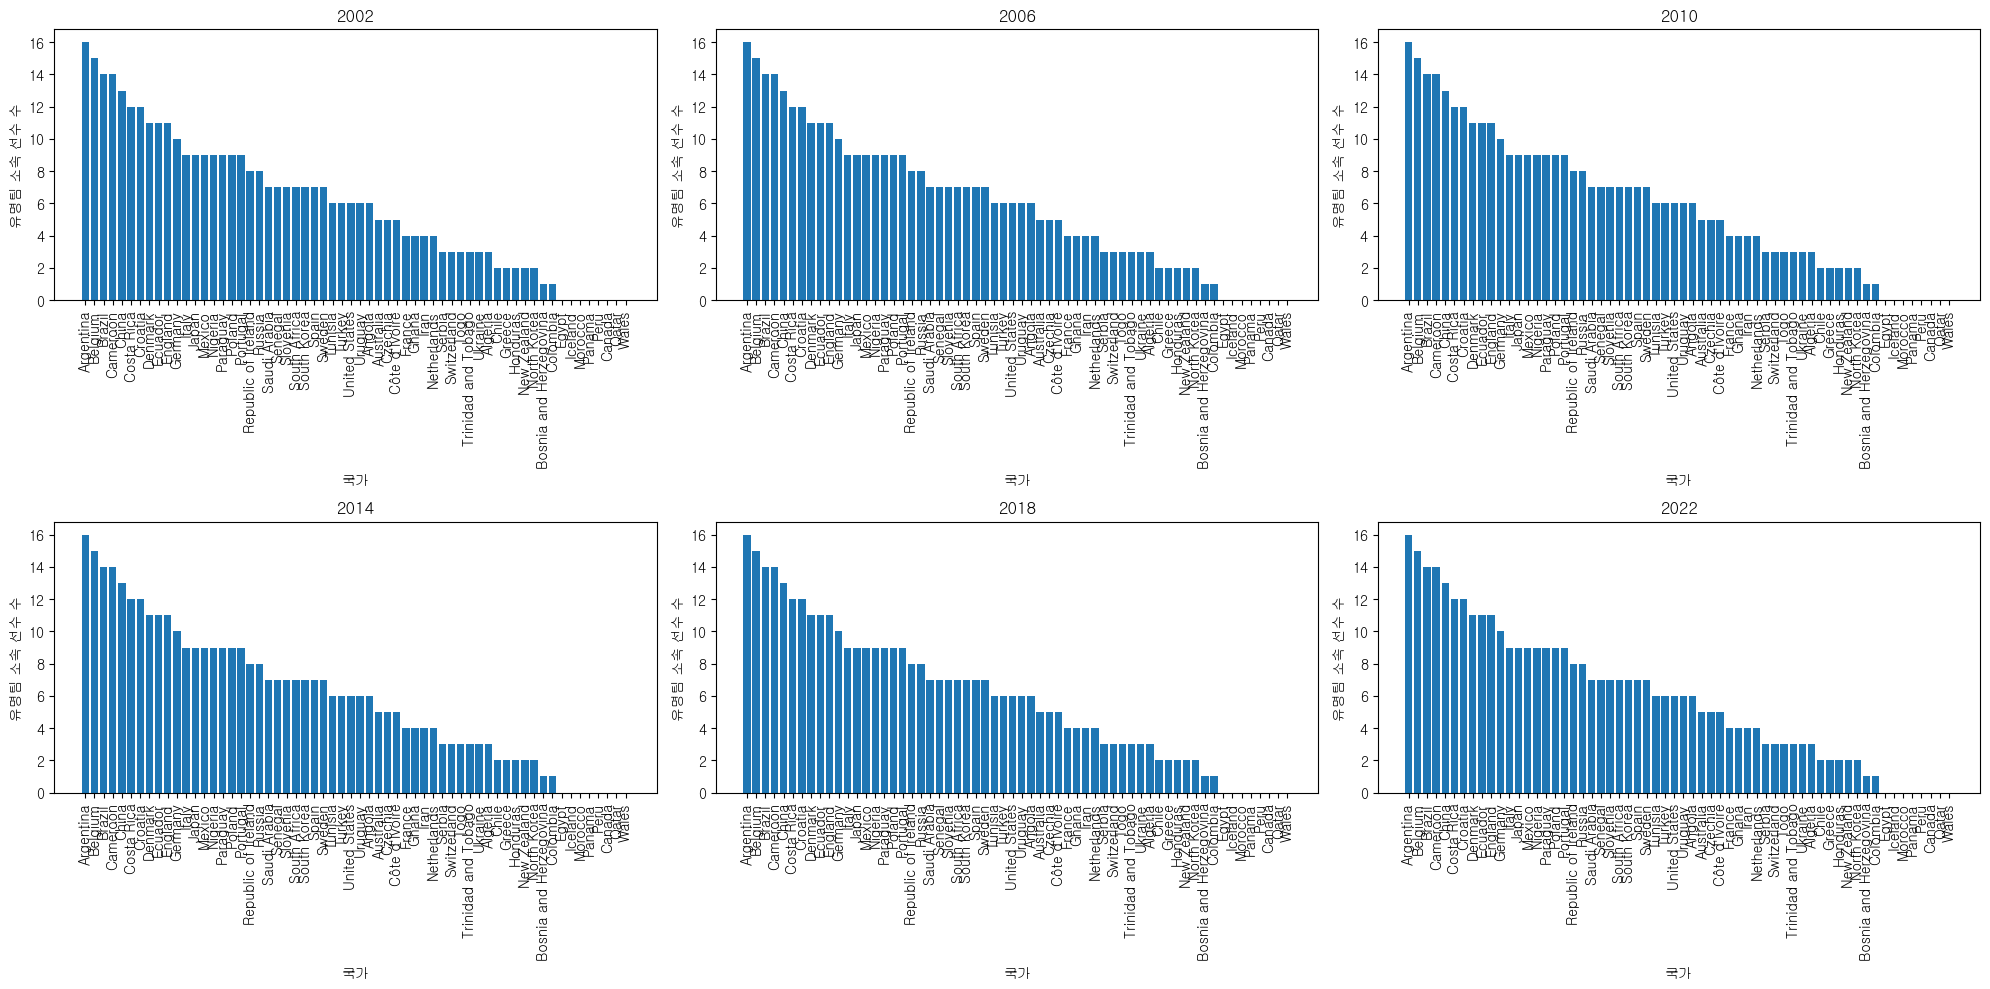

In [1806]:
# top20소속선수수 시각화
years = sorted(df_top20['년도'].unique())
fig, ax = plt.subplots(2, 3, figsize=(20, 10))

for i, year in enumerate(years):
    row = i // 3 
    col = i % 3

    ax[row, col].bar(df_top20['국가'], df_top20['top20소속선수수'].sort_values(ascending=False))
    ax[row, col].set_title(f'{year}')
    ax[row, col].set_xlabel('국가')
    ax[row, col].set_ylabel('유명팀 소속 선수 수')
    ax[row, col].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

3. CSV 파일 변환
- 데이터: 연도 & 나라별 선수 평균나이 및 유명팀 소속 선수수
- 파일명: players_age_top20_2002_2022.csv
- 컬럼: 년도, 국가, 평균나이, top20소속선수수

In [1807]:
df = pd.merge(df_age, df_top20, on=['년도', '국가'])
df.to_csv('data/players_age_top20_2002_2022.csv', index=False, encoding='utf-8')
df

,년도,국가,평균나이,top20소속선수수
0,2002,Argentina,28.78,6
1,2002,Belgium,29.52,0
2,2002,Brazil,26.74,3
3,2002,Cameroon,25.39,1
4,2002,China,26.65,2
...,...,...,...,...
183,2022,Switzerland,27.08,4
184,2022,Tunisia,28.00,0
185,2022,United States,25.31,2
186,2022,Uruguay,27.85,5


---
##### 피파 게임 선수
1. 데이터 로드 및 확인

In [1808]:
dfs = []

for year in ['05', '09', '13', '17', '21']:
    df = pd.read_csv(f'data/fifa{year}.csv', sep=';', encoding='utf-8')
    df['year'] = int('20' + year) + 1
    dfs.append(df)

# 2002년 데이터 만들기 (2005년도 데이터 이용)
df_05 = dfs[0].copy()
df_05['year'] = 2002
dfs.insert(0, df_05)  # 리스트 맨 앞에 2002년 데이터 추가

df_fifa = pd.concat(dfs, ignore_index=True)
df_fifa

,id,Fullname,current_rating,potential_rating,height,weight,preferred_foot,birth_date,preferred_positions,work_rate,...,sprint_speed,agility,jumping,curve,fk_acc,penalties,volleys,gk_handling,gk_kicking,gk_reflexes
0,3721,Nenad Dzodic,68,80,187,81,Right,04/01/1977,CB,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,146781,Aranzábal,80,85,186,78,Left,15/03/1973,LWB-LWM-LAM,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,49888,Anders Jonsson,45,56,186,83,Right,05/11/1975,GK,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,45452,Jonathan Bourdon,63,80,180,75,Right,03/09/1981,GK,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,150655,Gilles Yapi Yapo,79,84,171,63,Right,30/01/1982,RAM-RM,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87079,258161,Peteiro,61,72,176,71,Right,26/05/1998,CB,Medium / Medium,...,63.0,45.0,71.0,34.0,37.0,43.0,31.0,15.0,13.0,11.0
87080,242995,Joseph Mora,68,69,176,60,Left,15/01/1993,LB-LWB,Medium / Medium,...,78.0,76.0,67.0,50.0,39.0,44.0,39.0,13.0,14.0,11.0
87081,257294,Shandon Hopeau,56,68,180,73,Right,01/12/1998,RM-RW,Medium / Medium,...,65.0,51.0,44.0,38.0,32.0,54.0,42.0,14.0,10.0,7.0
87082,237895,Vito van Crooij,67,71,177,70,Right,29/01/1996,LW-RW,High / Low,...,78.0,77.0,71.0,69.0,66.0,62.0,62.0,14.0,9.0,12.0


In [1809]:
df_fifa.info()
df_fifa.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87084 entries, 0 to 87083
Data columns (total 55 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   87084 non-null  int64  
 1   Fullname             87084 non-null  object 
 2   current_rating       87084 non-null  int64  
 3   potential_rating     87084 non-null  int64  
 4   height               87084 non-null  int64  
 5   weight               87084 non-null  int64  
 6   preferred_foot       87084 non-null  object 
 7   birth_date           87084 non-null  object 
 8   preferred_positions  87084 non-null  object 
 9   work_rate            50344 non-null  object 
 10  weak_foot            87084 non-null  int64  
 11  skill_moves          87084 non-null  int64  
 12  value                40808 non-null  object 
 13  wage                 44480 non-null  float64
 14  ball_control         87084 non-null  int64  
 15  dribbling            87084 non-null 

,id,current_rating,potential_rating,height,weight,weak_foot,skill_moves,wage,ball_control,dribbling,...,sprint_speed,agility,jumping,curve,fk_acc,penalties,volleys,gk_handling,gk_kicking,gk_reflexes
count,87084.000000,87084.000000,87084.000000,87084.000000,87084.000000,87084.000000,87084.000000,44480.000000,87084.000000,87084.000000,...,50344.000000,50344.000000,50344.000000,50344.00000,50344.000000,50344.000000,50344.000000,50344.000000,50344.000000,34658.000000
mean,166870.059081,64.364074,72.296289,181.060574,75.316396,2.165392,1.330015,8.382904,57.600156,53.983717,...,64.500179,64.004886,60.956201,46.39391,45.174221,47.041634,34.632469,16.116935,16.249702,16.712274
std,67351.391987,8.298049,7.824688,6.461897,6.879868,1.422233,1.279192,17.253498,16.100766,17.953276,...,14.305427,13.709341,15.075758,18.39510,17.290543,16.680879,21.612225,16.716971,17.081661,18.020110
min,2.000000,35.000000,41.000000,152.000000,0.000000,0.000000,0.000000,1.300000,5.000000,4.000000,...,11.000000,14.000000,1.000000,4.00000,4.000000,2.000000,1.000000,1.000000,1.000000,1.000000
25%,140784.000000,59.000000,67.000000,177.000000,70.000000,0.000000,0.000000,2.000000,51.000000,44.000000,...,57.000000,56.000000,54.000000,33.00000,33.000000,36.000000,13.000000,8.000000,8.000000,8.000000
50%,183711.000000,65.000000,72.000000,181.000000,75.000000,3.000000,2.000000,2.800000,61.000000,58.000000,...,67.000000,66.000000,63.000000,47.00000,45.000000,48.000000,34.000000,11.000000,11.000000,11.000000
75%,213271.000000,70.000000,77.000000,185.000000,80.000000,3.000000,2.000000,7.600000,68.000000,67.000000,...,74.000000,73.000000,71.000000,61.00000,59.000000,60.000000,53.000000,14.000000,14.000000,14.000000
max,259373.000000,97.000000,99.000000,208.000000,110.000000,5.000000,5.000000,500.000000,98.000000,98.000000,...,97.000000,96.000000,95.000000,94.00000,95.000000,96.000000,93.000000,92.000000,95.000000,90.000000


2. 전처리

In [1810]:
# 사용하지 않는 컬럼 삭제
exclude_cols = [
    'id', 'potential_rating', 'height', 'weight',
    'preferred_foot', 'preferred_positions', 'work_rate',
    'weak_foot', 'skill_moves', 'value', 'wage',
    'aggression', 'heading', 'finishing', 'long_shots', 'FK_Acc.',
    'reflexes', 'handling', 'att_position', 'interceptions', 'vision', 'balance',
    'agility', 'jumping', 'curve', 'fk_acc', 'penalties', 'volleys',
    'gk_handling', 'gk_kicking', 'gk_reflexes'
]

df_fifa.drop(exclude_cols, axis=1, inplace=True)
df_fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87084 entries, 0 to 87083
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Fullname        87084 non-null  object 
 1   current_rating  87084 non-null  int64  
 2   birth_date      87084 non-null  object 
 3   ball_control    87084 non-null  int64  
 4   dribbling       87084 non-null  int64  
 5   marking         87084 non-null  int64  
 6   tackling        36740 non-null  float64
 7   composure       87084 non-null  int64  
 8   reaction        36740 non-null  float64
 9   crossing        87084 non-null  int64  
 10  short_pass      87084 non-null  int64  
 11  long_pass       87084 non-null  int64  
 12  acceleration    87084 non-null  int64  
 13  stamina         87084 non-null  int64  
 14  strength        87084 non-null  int64  
 15  spring_speed    36740 non-null  float64
 16  shot_power      87084 non-null  int64  
 17  gk_positioning  87084 non-null 

In [1811]:
# null 컬럼 확인
df_fifa[['reaction', 'reactions']]

,reaction,reactions
0,66.0,NaN
1,80.0,NaN
2,28.0,NaN
3,55.0,NaN
4,62.0,NaN
...,...,...
87079,NaN,57.0
87080,NaN,65.0
87081,NaN,41.0
87082,NaN,64.0


In [1812]:
df_fifa[['spring_speed', 'sprint_speed']]

,spring_speed,sprint_speed
0,53.0,NaN
1,69.0,NaN
2,50.0,NaN
3,55.0,NaN
4,60.0,NaN
...,...,...
87079,NaN,63.0
87080,NaN,78.0
87081,NaN,65.0
87082,NaN,78.0


In [1813]:
df_fifa[['slide_tackle', 'stand_tackle', 'tackling']]

,slide_tackle,stand_tackle,tackling
0,NaN,NaN,67.0
1,NaN,NaN,85.0
2,NaN,NaN,35.0
3,NaN,NaN,33.0
4,NaN,NaN,65.0
...,...,...,...
87079,73.0,73.0,NaN
87080,64.0,68.0,NaN
87081,23.0,25.0,NaN
87082,28.0,33.0,NaN


In [1814]:
# reaction, reactions 컬럼 통일
df_fifa['reaction'].fillna(df_fifa['reactions'], inplace=True)

# reaction, reactions 컬럼 통일
df_fifa['sprint_speed'].fillna(df_fifa['spring_speed'], inplace=True)

# slide_tackle, stand_tackle, tackling 컬럼 통일
tackle_mean = df_fifa[['slide_tackle', 'stand_tackle']].mean(axis=1)
df_fifa['tackling'].fillna(tackle_mean, inplace=True)

# 남은 컬럼 삭제
df_fifa.drop(['reactions', 'spring_speed', 'slide_tackle', 'stand_tackle'], axis=1, inplace=True)

C:\Users\Playdata\AppData\Local\Temp\ipykernel_10480\3498751485.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_fifa['reaction'].fillna(df_fifa['reactions'], inplace=True)
C:\Users\Playdata\AppData\Local\Temp\ipykernel_10480\3498751485.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves

In [1815]:
df_fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87084 entries, 0 to 87083
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Fullname        87084 non-null  object 
 1   current_rating  87084 non-null  int64  
 2   birth_date      87084 non-null  object 
 3   ball_control    87084 non-null  int64  
 4   dribbling       87084 non-null  int64  
 5   marking         87084 non-null  int64  
 6   tackling        87084 non-null  float64
 7   composure       87084 non-null  int64  
 8   reaction        87084 non-null  float64
 9   crossing        87084 non-null  int64  
 10  short_pass      87084 non-null  int64  
 11  long_pass       87084 non-null  int64  
 12  acceleration    87084 non-null  int64  
 13  stamina         87084 non-null  int64  
 14  strength        87084 non-null  int64  
 15  shot_power      87084 non-null  int64  
 16  gk_positioning  87084 non-null  int64  
 17  gk_diving       87084 non-null 

In [1816]:
# 'gk_positioning', 'gk_diving'의 평균 -> 'gk'
df_fifa['gk'] = (df_fifa['gk_positioning'] + df_fifa['gk_diving']) / 2

# 'short_pass', 'long_pass'의 평균 -> 'passing'
df_fifa['passing'] = (df_fifa['short_pass'] + df_fifa['long_pass']) / 2

# 'marking', 'tackling'의 평균 -> 'defending'
df_fifa['defending'] = (df_fifa['marking'] + df_fifa['tackling']) / 2

df_fifa.drop(['gk_positioning', 'gk_diving', 'short_pass', 'long_pass', 'marking', 'tackling'], axis=1, inplace=True)
df_fifa

,Fullname,current_rating,birth_date,ball_control,dribbling,composure,reaction,crossing,acceleration,stamina,strength,shot_power,year,sprint_speed,gk,passing,defending
0,Nenad Dzodic,68,04/01/1977,68,52,58,66.0,53,63,55,56,66,2002,53.0,26.5,57.5,70.50
1,Aranzábal,80,15/03/1973,75,35,68,80.0,47,69,83,85,80,2002,69.0,32.0,71.5,84.50
2,Anders Jonsson,45,05/11/1975,28,35,40,28.0,24,24,35,35,26,2002,50.0,52.5,35.0,35.50
3,Jonathan Bourdon,63,03/09/1981,26,34,60,55.0,40,24,50,60,55,2002,55.0,64.0,28.0,29.00
4,Gilles Yapi Yapo,79,30/01/1982,75,89,70,62.0,69,70,71,91,45,2002,60.0,28.5,77.5,59.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87079,Peteiro,61,26/05/1998,43,35,48,57.0,31,54,60,48,45,2022,63.0,10.5,37.5,66.00
87080,Joseph Mora,68,15/01/1993,63,64,59,65.0,63,78,73,54,59,2022,78.0,10.5,55.0,66.50
87081,Shandon Hopeau,56,01/12/1998,57,60,44,41.0,57,66,51,52,45,2022,65.0,10.5,53.5,24.50
87082,Vito van Crooij,67,29/01/1996,67,68,65,64.0,63,74,81,58,74,2022,78.0,13.0,57.0,35.25


3. CSV 파일 변환
- 데이터: 연도 & 나라별 평균 선수 스탯
- 파일명: players_stat_2002_2022.csv
- 컬럼: 년도, 국가, 스탯리스트

In [1817]:
# 피파 선수 데이터에서 birth_date 컬럼 정제
df_fifa['birth_date'] = pd.to_datetime(df_fifa['birth_date'], format='%d/%m/%Y')
df_fifa.info()

df_fifa['birth_date'] = df_fifa['birth_date'].dt.strftime('%Y.%m.%d')
df_fifa.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87084 entries, 0 to 87083
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Fullname        87084 non-null  object        
 1   current_rating  87084 non-null  int64         
 2   birth_date      87084 non-null  datetime64[ns]
 3   ball_control    87084 non-null  int64         
 4   dribbling       87084 non-null  int64         
 5   composure       87084 non-null  int64         
 6   reaction        87084 non-null  float64       
 7   crossing        87084 non-null  int64         
 8   acceleration    87084 non-null  int64         
 9   stamina         87084 non-null  int64         
 10  strength        87084 non-null  int64         
 11  shot_power      87084 non-null  int64         
 12  year            87084 non-null  int64         
 13  sprint_speed    87084 non-null  float64       
 14  gk              87084 non-null  float64       
 15  pa

,Fullname,current_rating,birth_date,ball_control,dribbling,composure,reaction,crossing,acceleration,stamina,strength,shot_power,year,sprint_speed,gk,passing,defending
0,Nenad Dzodic,68,1977.01.04,68,52,58,66.0,53,63,55,56,66,2002,53.0,26.5,57.5,70.5
1,Aranzábal,80,1973.03.15,75,35,68,80.0,47,69,83,85,80,2002,69.0,32.0,71.5,84.5
2,Anders Jonsson,45,1975.11.05,28,35,40,28.0,24,24,35,35,26,2002,50.0,52.5,35.0,35.5
3,Jonathan Bourdon,63,1981.09.03,26,34,60,55.0,40,24,50,60,55,2002,55.0,64.0,28.0,29.0
4,Gilles Yapi Yapo,79,1982.01.30,75,89,70,62.0,69,70,71,91,45,2002,60.0,28.5,77.5,59.5


In [1818]:
# 월드컵 출전 선수 데이터에서 필요없는 컬럼 제거 및 이름 변경
df_worldcup = df_worldcup.drop(['소속팀', '나이'], axis=1)
df_worldcup.columns = ['year', 'nation', 'Fullname', 'birth_date']
df_worldcup

,year,nation,Fullname,birth_date
0,2002,Senegal,Tony Sylva,1975.05.17
1,2002,Senegal,Omar Diallo,1972.09.28
2,2002,Senegal,Kalidou Cissokho,1978.08.28
3,2002,Senegal,Omar Daf,1977.02.12
4,2002,Senegal,Pape Malick Diop,1974.12.29
...,...,...,...,...
4414,2022,South Korea,KWON Changhoon,1994.06.30.
4415,2022,South Korea,JEONG Wooyeong,1999.09.20.
4416,2022,South Korea,SONG Minkyu,1999.09.12.
4417,2022,South Korea,CHO Guesung,1998.01.25.


In [1819]:
# birth_date 컬럼 정제
# df_worldcup['birth_date'] = df_worldcup['birth_date'].str.strip() -> 숫자 사이 공백 제거 안됨 -> replace 사용

df_worldcup['birth_date'] = df_worldcup['birth_date'].str.replace(' ', '')
df_worldcup['birth_date'] = df_worldcup['birth_date'].str.rstrip('.')

df_worldcup[150:160]['birth_date']

150    1969.06.24
151    1975.05.26
152    1974.03.18
153    1980.07.11
154    1974.07.10
155    1975.06.23
156    1977.12.07
157    1982.03.17
158    1977.12.02
159    1977.11.12
Name: birth_date, dtype: object

< 원래 작성 코드 >
rstrip 자체가 있으면 제거하고 아니면 넘어가므로 if문 제거

```
if df_worldcup['birth_date'].str.endswith('.'):
    df_worldcup['birth_date'] = df_worldcup['birth_date'].str.rstrip('.')
df_worldcup['birth_date']
```

In [1820]:
# 선수 이름 정규화, Player ID 컬럼을 새로 생성함
import unicodedata, re

def normalize_name(name):
    # 유니코드 정규화
    name_nfkd = unicodedata.normalize('NFKD', name)
    name_nfkd = ''.join(c for c in name_nfkd if not unicodedata.combining(c))
    tokens = re.sub(r"[.\-]", " ", name_nfkd).casefold().split()

    if len(tokens) == 2 and len(tokens[0]) <= 3:     
        ordered = tokens                             
    elif len(tokens) == 2 and len(tokens[1]) <= 3:   
        ordered = tokens[::-1]                      
    else:
        ordered = tokens

    return ''.join(ordered)

df_worldcup['N_name'] = df_worldcup["Fullname"].apply(normalize_name)
df_fifa['N_name'] = df_fifa["Fullname"].apply(normalize_name)

In [1821]:
df_worldcup['N_name'], df_fifa['N_name']

(0             tonysylva
 1            omardiallo
 2       kalidoucissokho
 3               dafomar
 4        papemalickdiop
              ...       
 4414      kwonchanghoon
 4415      jeongwooyeong
 4416         songminkyu
 4417         choguesung
 4418          hwanguijo
 Name: N_name, Length: 4419, dtype: object,
 0            nenaddzodic
 1              aranzabal
 2          andersjonsson
 3        jonathanbourdon
 4         gillesyapiyapo
               ...       
 87079            peteiro
 87080         josephmora
 87081      shandonhopeau
 87082      vitovancrooij
 87083      dominikfranke
 Name: N_name, Length: 87084, dtype: object)

In [1822]:
df_worldcup.to_csv('data/normalized_worldcup.csv', encoding='utf-8', index=False)
df_fifa.to_csv('data/normalized_fifa.csv', encoding='utf-8', index=False)

In [1823]:
# 데이터 1차 병합: 정규화한 N_name, year, birth_date가 같은 행 병합
df_players = pd.merge(df_worldcup, df_fifa, on=['N_name', 'year', 'birth_date'], how='left')
df_players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4420 entries, 0 to 4419
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            4420 non-null   int64  
 1   nation          4420 non-null   object 
 2   Fullname_x      4420 non-null   object 
 3   birth_date      4420 non-null   object 
 4   N_name          4420 non-null   object 
 5   Fullname_y      2810 non-null   object 
 6   current_rating  2810 non-null   float64
 7   ball_control    2810 non-null   float64
 8   dribbling       2810 non-null   float64
 9   composure       2810 non-null   float64
 10  reaction        2810 non-null   float64
 11  crossing        2810 non-null   float64
 12  acceleration    2810 non-null   float64
 13  stamina         2810 non-null   float64
 14  strength        2810 non-null   float64
 15  shot_power      2810 non-null   float64
 16  sprint_speed    2810 non-null   float64
 17  gk              2810 non-null   f

In [1824]:
df_players

,year,nation,Fullname_x,birth_date,N_name,Fullname_y,current_rating,ball_control,dribbling,composure,reaction,crossing,acceleration,stamina,strength,shot_power,sprint_speed,gk,passing,defending
0,2002,Senegal,Tony Sylva,1975.05.17,tonysylva,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2002,Senegal,Omar Diallo,1972.09.28,omardiallo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2002,Senegal,Kalidou Cissokho,1978.08.28,kalidoucissokho,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2002,Senegal,Omar Daf,1977.02.12,dafomar,Omar Daf,70.0,69.0,43.0,70.0,59.0,62.0,59.0,56.0,55.0,60.0,70.0,28.0,46.0,74.50
4,2002,Senegal,Pape Malick Diop,1974.12.29,papemalickdiop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4415,2022,South Korea,KWON Changhoon,1994.06.30,kwonchanghoon,Kwon Chang Hoon,74.0,77.0,76.0,76.0,76.0,74.0,75.0,68.0,48.0,69.0,65.0,7.5,71.5,46.25
4416,2022,South Korea,JEONG Wooyeong,1999.09.20,jeongwooyeong,Jeong Woo Yeong,68.0,74.0,73.0,57.0,60.0,65.0,81.0,64.0,54.0,51.0,73.0,9.5,57.0,34.00
4417,2022,South Korea,SONG Minkyu,1999.09.12,songminkyu,Song Min Kyu,65.0,72.0,69.0,57.0,55.0,54.0,81.0,63.0,71.0,67.0,71.0,10.0,56.0,23.75
4418,2022,South Korea,CHO Guesung,1998.01.25,choguesung,Cho Gue Sung,56.0,54.0,41.0,58.0,64.0,22.0,74.0,71.0,63.0,50.0,76.0,12.0,34.5,17.25


In [1825]:
# 이름이 정규화됐지만 매칭이 되지 않은 데이터
# 예) sonheungmin / heungminson -> lev_distance 알고리즘으로 해결
df_null = df_players[df_players['current_rating'].isnull()]
df_null

,year,nation,Fullname_x,birth_date,N_name,Fullname_y,current_rating,ball_control,dribbling,composure,reaction,crossing,acceleration,stamina,strength,shot_power,sprint_speed,gk,passing,defending
0,2002,Senegal,Tony Sylva,1975.05.17,tonysylva,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2002,Senegal,Omar Diallo,1972.09.28,omardiallo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2002,Senegal,Kalidou Cissokho,1978.08.28,kalidoucissokho,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2002,Senegal,Pape Malick Diop,1974.12.29,papemalickdiop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,2002,Senegal,Khalilou Fadiga,1974.12.30,khaliloufadiga,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4391,2022,Uruguay,Maxi GÓMEZ,1996.08.14,maxigomez,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4405,2022,South Korea,CHO Yumin,1996.11.17,choyumin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4406,2022,South Korea,JUNG Wooyoung,1989.12.14,jungwooyoung,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4407,2022,South Korea,HWANG Inbeom,1996.09.20,hwanginbeom,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1826]:
pip install Levenshtein

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from Levenshtein import distance

# 가장 비슷한 이름으로 매칭
def match_closest_name(row, df_fifa):
    candidates = df_fifa[(df_fifa['year'] == row['year']) & (df_fifa['birth_date'] == row['birth_date'])]
    
    # 후보 없으면 NaN 반환
    if candidates.empty:
        return pd.Series([pd.NA]*len(df_fifa.columns), index=df_fifa.columns)
    
    # Levenshtein 거리 계산
    candidates = candidates.copy()
    candidates['name_dist'] = candidates['N_name'].apply(lambda x: distance(x, row['N_name']))
    
    # 가장 작은 거리 선택
    best_match = candidates.loc[candidates['name_dist'].idxmin()]
    return best_match.drop('name_dist')

df_matched = df_null.apply(lambda row: match_closest_name(row, df_fifa), axis=1)

# 원본 df_players의 NaN 위치에 채우기
cols_to_fill = [col for col in df_fifa.columns if col not in ['N_name', 'year', 'birth_date']]
df_players.update(df_matched[cols_to_fill])

C:\Users\Playdata\AppData\Local\Temp\ipykernel_10480\2913164104.py:23: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[np.int64(75) np.int64(56) nan ... 65.0 56.0 73.0]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_players.update(df_matched[cols_to_fill])
C:\Users\Playdata\AppData\Local\Temp\ipykernel_10480\2913164104.py:23: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[np.int64(28) np.int64(57) nan ... 72.0 54.0 72.0]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_players.update(df_matched[cols_to_fill])
C:\Users\Playdata\AppData\Local\Temp\ipykernel_10480\2913164104.py:23: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[np.int64(35) np.int64(51) nan ... 69.0 41.0 74.0]' has dty

In [1828]:
df_players['composure'].isnull().sum()

np.int64(189)

In [1829]:
df_players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4420 entries, 0 to 4419
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   year            4420 non-null   int64 
 1   nation          4420 non-null   object
 2   Fullname_x      4420 non-null   object
 3   birth_date      4420 non-null   object
 4   N_name          4420 non-null   object
 5   Fullname_y      2810 non-null   object
 6   current_rating  4231 non-null   object
 7   ball_control    4231 non-null   object
 8   dribbling       4231 non-null   object
 9   composure       4231 non-null   object
 10  reaction        4231 non-null   object
 11  crossing        4231 non-null   object
 12  acceleration    4231 non-null   object
 13  stamina         4231 non-null   object
 14  strength        4231 non-null   object
 15  shot_power      4231 non-null   object
 16  sprint_speed    4231 non-null   object
 17  gk              4231 non-null   object
 18  passing 

병합된 데이터 전처리

In [1830]:
# 필요 없는 컬럼 제거
df_players.drop(['N_name', 'Fullname_x', 'Fullname_y', 'birth_date'], axis=1, inplace=True)

# null 값 제거
df_players.dropna(inplace=True)

In [1834]:
df_players.columns

Index(['year', 'nation', 'current_rating', 'ball_control', 'dribbling',
       'composure', 'reaction', 'crossing', 'acceleration', 'stamina',
       'strength', 'shot_power', 'sprint_speed', 'gk', 'passing', 'defending'],
      dtype='object')

In [1832]:
df_players.to_csv('data/players_stats_2002_2022.csv', encoding='utf-8', index=False)

연도별&나라별 스탯 평균

In [1841]:
cols = ['ball_control', 'dribbling', 'composure', 'reaction', 'crossing',
        'acceleration', 'stamina', 'strength', 'shot_power', 'sprint_speed',
        'gk', 'passing', 'defending']

df_stat = df_players.groupby(['year', 'nation'])[cols].agg(lambda x: round(x.mean(), 2)).reset_index()

df_stat.to_csv('data/avg_stats_2002_2022.csv', encoding='utf-8', index=False)